# < Evaluation Metrics >
https://en.wikipedia.org/wiki/Confusion_matrix

## 1. Binary Classification

### - Prepare labels

In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

np.random.seed(99)

y_true = np.random.randint(2, size=20)             # 20 labels / 10 classes
y_pred = np.random.randint(2, size=20)

print('Labels:      ', y_true)
print('Predictions: ', y_pred)

Labels:       [1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1]
Predictions:  [0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0]


### - Confusion Matrix

In [3]:
#
#                                  Predicted Condition
#                      ---------------------------------------------
#                      |      Positive      |       Negative       |
#           --------------------------------------------------------
# Actual    | Positive | True Positive (TP)  | False Negative (FN) |
#           --------------------------------------------------------
# Condition | Negative | False Positive (FP) | True Negative (TN)  |
#           --------------------------------------------------------


print(confusion_matrix(y_true, y_pred, labels=[1, 0]))

[[7 6]
 [2 5]]


### - Accuracy ($\frac{TP + TN}{TP + FN + FP + TN}$)

In [4]:
print(accuracy_score(y_true, y_pred), ' or ', str(accuracy_score(y_true, y_pred)*100)+'%')



0.6  or  60.0%


### - Precision ($\frac{TP}{TP + FP}$)

In [5]:
print('Class 1: ', precision_score(y_true, y_pred))
# print('Class 0: ', precision_score(y_true, y_pred, pos_label=0))


Class 1:  0.7777777777777778


### - Recall ($\frac{TP}{TP + FN}$)

In [6]:
print('Class 1: ', recall_score(y_true, y_pred))
# print('Class 0: ', recall_score(y_true, y_pred, pos_label=0))

Class 1:  0.5384615384615384


### - F1-Score ($2 * \frac{Precision * Recall}{Precision + Recall} = \frac{TP + TP}{TP + FP + TP + FN} = \frac{2TP}{2TP + FP + FN}$)

In [7]:
print('Class 1: ', f1_score(y_true, y_pred))
# print('Class 0: ', f1_score(y_true, y_pred, pos_label=0))

Class 1:  0.6363636363636364


In [8]:
print(metrics.classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.455     0.714     0.556         7
           1      0.778     0.538     0.636        13

    accuracy                          0.600        20
   macro avg      0.616     0.626     0.596        20
weighted avg      0.665     0.600     0.608        20



### - Model Comparison

In [9]:
y_pred2 = np.random.randint(2, size=20)

print('Labels:  ', y_true)
print('Model 1: ', y_pred)
print('Model 2: ', y_pred2)


Labels:   [1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1]
Model 1:  [0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0]
Model 2:  [0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0]


In [10]:
print('          Acc.  Prec. Rec.  F1')
print('Model 1:  {:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)))
print('Model 2:  {:.2f}  {:.2f}  {:.2f}  {:.2f}'.format(accuracy_score(y_true, y_pred2), precision_score(y_true, y_pred2), recall_score(y_true, y_pred2), f1_score(y_true, y_pred2)))


          Acc.  Prec. Rec.  F1
Model 1:  0.60  0.78  0.54  0.64
Model 2:  0.55  0.70  0.54  0.61


### - Classification Report

In [11]:
print(metrics.classification_report(y_true, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.455     0.714     0.556         7
           1      0.778     0.538     0.636        13

    accuracy                          0.600        20
   macro avg      0.616     0.626     0.596        20
weighted avg      0.665     0.600     0.608        20



## 2. Multi-class Classification

### - Prepare labels

In [12]:
np.random.seed(99)

y_true = np.random.randint(3, size=20)             # 20 labels / 3 classes
y_pred = np.random.randint(3, size=20)

print('Labels:      ', y_true)
print('Predictions: ', y_pred)


Labels:       [1 1 0 1 0 2 0 1 0 1 2 1 1 0 1 2 0 2 0 0]
Predictions:  [0 0 0 1 2 2 1 2 0 0 1 2 1 1 0 1 1 2 2 2]


### - Confusion Matrix

In [13]:
print(confusion_matrix(y_true, y_pred, labels=[0, 1, 2]))


[[2 3 3]
 [4 2 2]
 [0 2 2]]


### - Precision, Recall, F1-Score

In [14]:
for_0_true = y_true.copy()
for_0_pred = y_pred.copy()

for_0_true[for_0_true!=0] = 1
for_0_pred[for_0_pred!=0] = 1

print('Class 0: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(for_0_true, for_0_pred, pos_label=0), recall_score(for_0_true, for_0_pred, pos_label=0), f1_score(for_0_true, for_0_pred, pos_label=0)))

for_1_true = y_true.copy()
for_1_pred = y_pred.copy()

for_1_true[for_1_true!=1] = 0
for_1_pred[for_1_pred!=1] = 0

print('Class 1: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(for_1_true, for_1_pred, pos_label=1), recall_score(for_1_true, for_1_pred, pos_label=1), f1_score(for_1_true, for_1_pred, pos_label=1)))

for_2_true = y_true.copy()
for_2_pred = y_pred.copy()

for_2_true[for_2_true!=2] = 0
for_2_pred[for_2_pred!=2] = 0
for_2_true[for_2_true==2] = 1
for_2_pred[for_2_pred==2] = 1

print('Class 2: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(for_2_true, for_2_pred, pos_label=1), recall_score(for_2_true, for_2_pred, pos_label=1), f1_score(for_2_true, for_2_pred, pos_label=1)))

Class 0: 0.3333  0.2500  0.2857
Class 1: 0.2857  0.2500  0.2667
Class 2: 0.2857  0.5000  0.3636


### - Accuracy

In [15]:
print('Accurayc: {:.2f}'.format(accuracy_score(y_true, y_pred)))

Accurayc: 0.30


### - Macro/Micro-Precision, Recall, F1-Score

In [16]:
print('       Prec. Rec.  F1')
print('Micro: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(y_true, y_pred, average='micro'), recall_score(y_true, y_pred, average='micro'), f1_score(y_true, y_pred, average='micro')))
print('Macro: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(y_true, y_pred, average='macro'), recall_score(y_true, y_pred, average='macro'), f1_score(y_true, y_pred, average='macro')))

       Prec. Rec.  F1
Micro: 0.3000  0.3000  0.3000
Macro: 0.3016  0.3333  0.3053


### - Classification Report

In [17]:
print(metrics.classification_report(y_true, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.333     0.250     0.286         8
           1      0.286     0.250     0.267         8
           2      0.286     0.500     0.364         4

    accuracy                          0.300        20
   macro avg      0.302     0.333     0.305        20
weighted avg      0.305     0.300     0.294        20



## 3. Multi-label Classification

### - Prepare labels

In [18]:
from sklearn.metrics import multilabel_confusion_matrix

np.random.seed(99)

y_true = np.random.randint(2, size=3*10).reshape([10, 3])             # 10 samples / 3 classes
y_pred = np.random.randint(2, size=3*10).reshape([10, 3])


print('Labels\t\tPredictions')
for true, pred in zip(y_true, y_pred):
    print(true, '\t', pred)


Labels		Predictions
[1 1 1] 	 [1 1 1]
[0 1 0] 	 [1 0 1]
[0 0 1] 	 [1 0 1]
[0 1 1] 	 [0 0 0]
[0 1 1] 	 [1 0 1]
[1 1 0] 	 [1 0 1]
[1 1 0] 	 [1 1 1]
[1 0 1] 	 [1 0 0]
[0 0 0] 	 [0 1 1]
[0 0 0] 	 [0 0 0]


### - Confusion Matrix

In [19]:
multilabel_confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

array([[[3, 3],
        [0, 4]],

       [[3, 1],
        [4, 2]],

       [[1, 4],
        [2, 3]]], dtype=int64)

### - Accuracy

In [20]:
print("Accuracy: ", accuracy_score(y_true, y_pred))

Accuracy:  0.2


### - Precision, Recall, F1-Score

In [21]:
print('         Prec.   Rec.    F1')
print('Class 0: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(y_true[:,0], y_pred[:,0]), recall_score(y_true[:,0], y_pred[:,0]), f1_score(y_true[:,0], y_pred[:,0])))
print('Class 1: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(y_true[:,1], y_pred[:,1]), recall_score(y_true[:,1], y_pred[:,1]), f1_score(y_true[:,1], y_pred[:,1])))
print('Class 2: {:.4f}  {:.4f}  {:.4f}'.format(precision_score(y_true[:,2], y_pred[:,2]), recall_score(y_true[:,2], y_pred[:,2]), f1_score(y_true[:,2], y_pred[:,2])))



         Prec.   Rec.    F1
Class 0: 0.5714  1.0000  0.7273
Class 1: 0.6667  0.3333  0.4444
Class 2: 0.4286  0.6000  0.5000


### - Classification Report

In [22]:
print(metrics.classification_report(y_true, y_pred, digits=4, zero_division=0))


              precision    recall  f1-score   support

           0     0.5714    1.0000    0.7273         4
           1     0.6667    0.3333    0.4444         6
           2     0.4286    0.6000    0.5000         5

   micro avg     0.5294    0.6000    0.5625        15
   macro avg     0.5556    0.6444    0.5572        15
weighted avg     0.5619    0.6000    0.5384        15
 samples avg     0.4167    0.4500    0.4133        15



## 4. Regression

### - Prepare datas

[0 1 2 3 4 5 6 7 8 9]
[0.55 1.55 2.55 3.55 4.55 5.55 6.55 7.55 8.55 9.55]
[ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10. ]


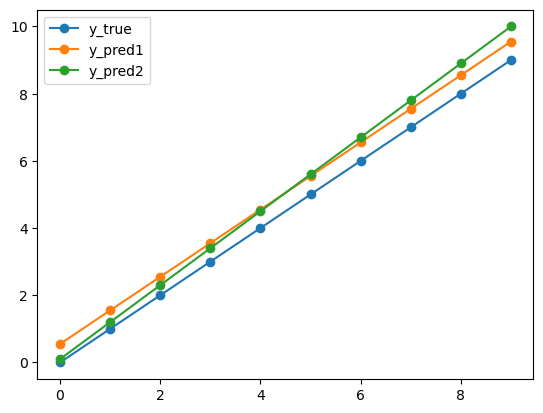

In [40]:
import matplotlib.pyplot as plt

np.random.seed(99)

y_true = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred1 = np.array(y_true + 0.55)
y_pred2 = np.array([0.1, 1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 10])

print(y_true)
print(y_pred1)
print(y_pred2)

plt.plot(y_true, label='y_true', marker='o')
plt.plot(y_pred1, label='y_pred1', marker='o')
plt.plot(y_pred2, label='y_pred2', marker='o')
plt.legend()
plt.show()


### - MAE (Mean Absolute Error, ($\frac{1}{n} \sum_{i=1}^{n} |x_i - x| $)) 

In [41]:
from sklearn.metrics import mean_absolute_error

print('MAE: ', mean_absolute_error(y_true, y_pred1), mean_absolute_error(y_true, y_pred2))



MAE:  0.55 0.55


### - MSE (Mean Squared Error, ($\frac{1}{n} \sum_{i=1}^{n} (x_i - x)^2 $)) 

In [42]:
from sklearn.metrics import mean_squared_error

print('MSE: ', mean_squared_error(y_true, y_pred1), mean_squared_error(y_true, y_pred2))



MAE:  0.30250000000000005 0.38499999999999995


### - RMSE (Root Mean Squared Error, ($\sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - x)^2} $)) 

In [43]:
print('RMSE: ', mean_squared_error(y_true, y_pred1)**0.5, mean_squared_error(y_true, y_pred2)**0.5)

RMSE:  0.55 0.6204836822995428
